<a href="https://colab.research.google.com/github/adong-hood/cs200/blob/main/assignment2_descriptive_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descriptive Statistics (Chapters 4–6, MDW)

**Topic**: Unidimensional Data, Descriptive Statistics, and Distribution Modeling



## Setup and Data Loading Example
First, we import the necessary libraries and fetch the dataset. We use the marathon dataset mentioned in Chapter 4, which contains the finish times (in minutes) of runners.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

# Loading data from the author's repository
url = "https://raw.githubusercontent.com/gagolews/teaching-data/master/marek/37_pzu_warsaw_marathon_mins.txt"
marathon = np.genfromtxt(url)

print(f"Number of observations: {len(marathon)}")
print(f"Top 5 gun times (mins): {marathon[:5]}") # Data are sorted increasingly

Number of observations: 6511
Top 5 gun times (mins): [129.32 130.75 130.97 134.17 134.68]


## Chapter 4: Inspecting the Data Distribution
We use histograms and the Empirical Cumulative Distribution Function (ECDF) to understand the shape of the data.

###4.3 Histograms

**A bell-shaped distribution** This figures use the female height dataset.
<pre>
counts – the number of data points in each bin
bins – the bin edge values
_not_important – the matplotlib objects (rectangles) used to draw the bars
</pre>
Bins are left-inclusive and right-exclusive, except for the last bin, which is right-inclusive. A bin covers `[left edge,right edge)` The final bin covers
`[left edge,right edge]`






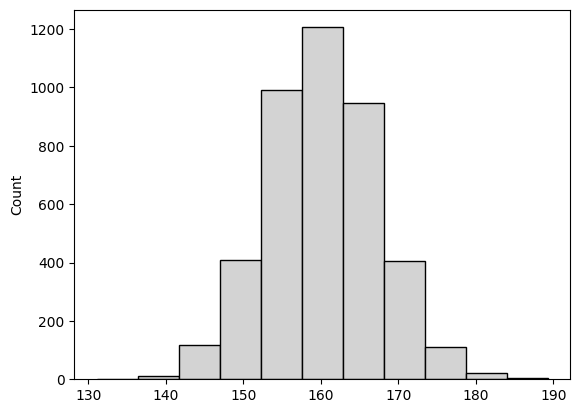

In [4]:

heights = np.genfromtxt("https://raw.githubusercontent.com/gagolews/" + "teaching-data/master/marek/nhanes_adult_female_height_2020.txt")
#plt.figure(figsize=(6, 4))
counts, bins, __not_important = plt.hist(heights, bins=11, color="lightgray", edgecolor="black")
plt.ylabel("Count")
plt.show()

**A right-skewed distribution**  A long tail on the right.

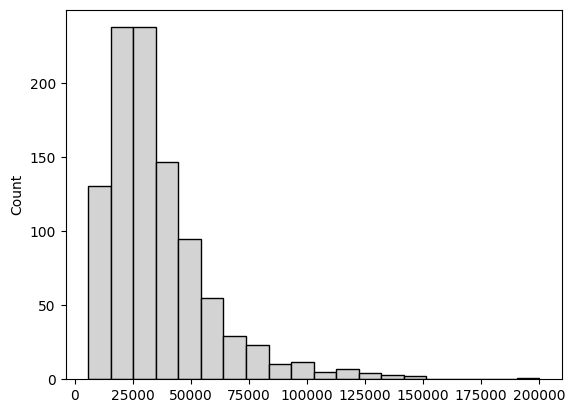

In [12]:
income = np.genfromtxt("https://raw.githubusercontent.com/gagolews/" + "teaching-data/master/marek/uk_income_simulated_2020.txt")
plt.hist(income, bins=20, color="lightgray", edgecolor="black")
plt.ylabel("Count")
plt.show()

**A left-skewed distribution**
<p>The marathon dataset typically exhibits a left-skewed distribution because the fastest runners (the "tail") are truncated or few, and most finishers cluster later.</p>
The figure below gives the histogram for the participants who finished the 42.2 km run in less than three hours, i.e., a truncated version of this dataset.

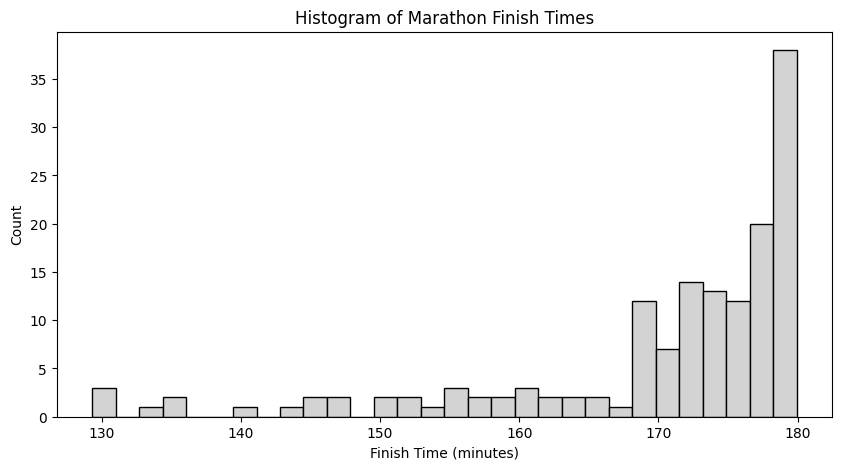

In [5]:
plt.figure(figsize=(10, 5))
plt.hist(marathon[marathon < 180], bins=30, color="lightgray", edgecolor="black")
plt.title("Histogram of Marathon Finish Times")
plt.xlabel("Finish Time (minutes)")
plt.ylabel("Count")
plt.show()

**Log-scale and heavy-tailed distributions**

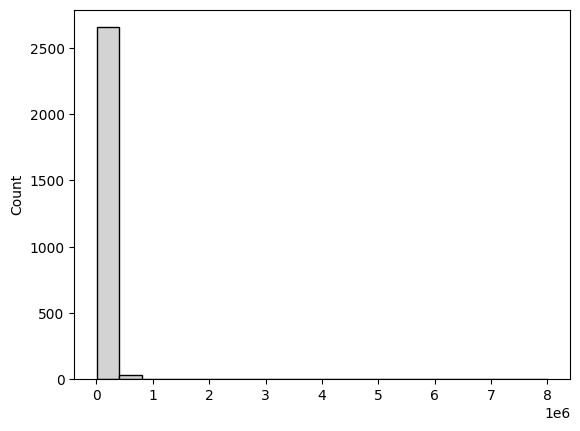

In [6]:
cities = np.genfromtxt("https://raw.githubusercontent.com/gagolews/" + "teaching-data/master/other/us_cities_2000.txt")
large_cities = cities[cities >= 10000]
plt.hist(large_cities, bins=20, color="lightgray", edgecolor="black")
plt.ylabel("Count")
plt.show()

<p>np.geomspace(start, stop, num) returns num values between start and stop where each value is obtained by multiplying by a constant factor.</p>
<pre>np.geomspace(1, 1000, 4) returns [   1.   10.  100. 1000.]</pre>

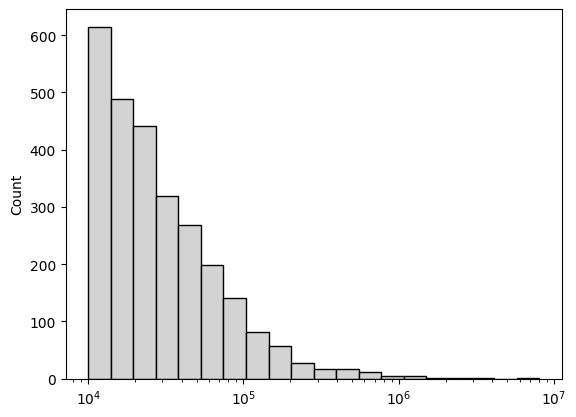

In [ ]:
logbins = np.geomspace(np.min(large_cities), np.max(large_cities), 21)
plt.hist(large_cities, bins=logbins, color="lightgray", edgecolor="black")
plt.xscale("log")
plt.ylabel("Count")
plt.show()

###4.4 Empirical Cumulative Distribution Function (ECDF)
The ECDF shows the proportion of observations less than or equal to a value $x$.

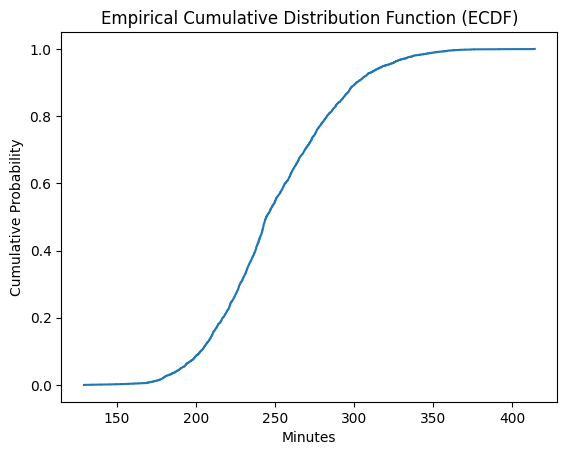

In [ ]:
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(x) + 1) / len(x) #- the fraction of data points ≤ the corresponding sorted value x
    return x, y  #-Each y[i] represents the proportion of data points ≤ x[i].

x_ecdf, y_ecdf = ecdf(marathon)
plt.step(x_ecdf, y_ecdf)
plt.title("Empirical Cumulative Distribution Function (ECDF)")
plt.xlabel("Minutes")
plt.ylabel("Cumulative Probability")
plt.show()

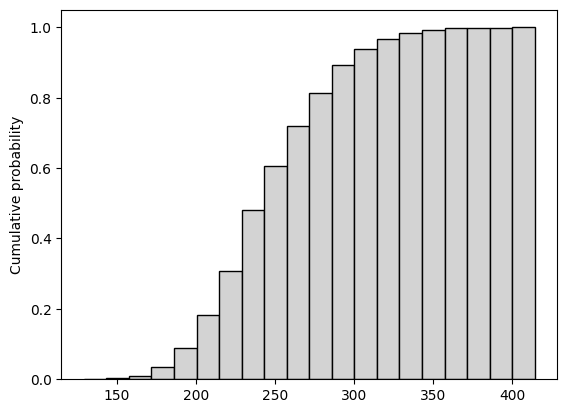

In [8]:
#- the plt option for cumulative distribution.
plt.hist(marathon, bins=20, cumulative=True, density=True, color="lightgray", edgecolor="black")
plt.ylabel("Cumulative probability")
plt.show()

## Chapter 5: Major Descriptive Statistics
Chapter 5 focuses on aggregating data into summary measures of location, dispersion, and shape.

###5.1 Measures of Location and Dispersion
Mean and Median: The arithmetic mean is sensitive to outliers, while the median is more robust.

Standard Deviation and IQR: These measure the spread of the data.

Mean    : 250.14
Median  : 244.65
Std Dev : 39.09
IQR     : 52.71
Q1 (25%): 223.00
Q3 (75%): 275.71


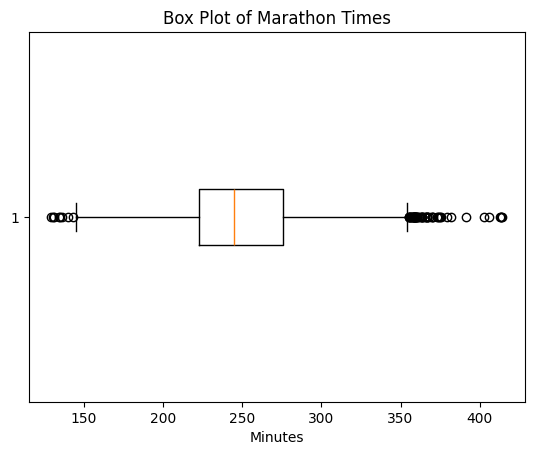

In [11]:

stats = {
    "Mean": np.mean(marathon),
    "Median": np.median(marathon),
    "Std Dev": np.std(marathon),
    "IQR": st.iqr(marathon),
    "Q1 (25%)": np.percentile(marathon, 25),
    "Q3 (75%)": np.percentile(marathon, 75)
}

for name, val in stats.items():
    print(f"{name:8}: {val:.2f}")

# 5.1.3 Box Plot for visualizing shape and outliers
plt.boxplot(marathon, vert=False)
plt.title("Box Plot of Marathon Times")
plt.xlabel("Minutes")
plt.show()


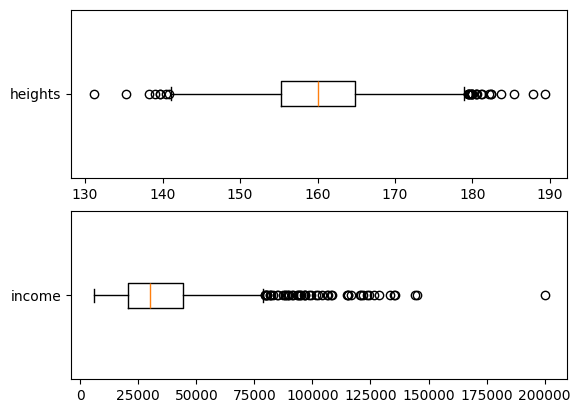

In [14]:
plt.subplot(2, 1, 1)  # two rows, one column; the first subplot
#plt.violinplot(heights, vert=False, showextrema=False)
plt.boxplot(heights, vert=False)
plt.yticks([1], ["heights"])  # label at y=1
plt.subplot(2, 1, 2)  # two rows, one column; the second subplot
#plt.violinplot(income, vert=False, showextrema=False)
plt.boxplot(income, vert=False)
plt.yticks([1], ["income"])  # label at y=1
plt.show()

The box spans from Q1 to Q3 (the IQR), with the median shown as a line inside the box. Whiskers extend to the smallest and largest values within 1.5 × IQR of Q1 and Q3; points beyond are considered outliers.

###5.3 Feature Scaling (Standardization)
Standardization transforms data to have a mean of 0 and a standard deviation of 1 (z-scores).

In [ ]:
marathon_z = (marathon - np.mean(marathon)) / np.std(marathon)
print(f"Standardized Mean: {np.mean(marathon_z):.2f}")
print(f"Standardized Std:  {np.std(marathon_z):.2f}")

Standardized Mean: -0.00
Standardized Std:  1.00


## Chapter 6: Continuous Probability Distributions
We assess how well a theoretical model (like the Normal distribution) fits our real-world data.

###6.1 Normal Distribution Fitting
We estimate parameters $(\mu, \sigma)$ from the data and compare the theoretical PDF to our histogram.

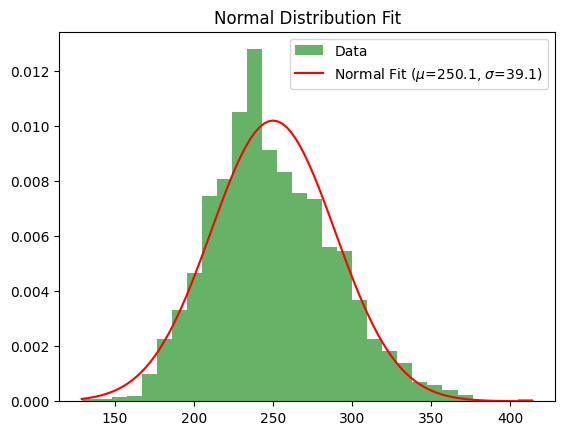

In [16]:
# Estimate parameters
mu, sigma = st.norm.fit(marathon) #- Estimate the normal distribution parameters that best describe the marathon data.
x_range = np.linspace(marathon.min(), marathon.max(), 100)
pdf = st.norm.pdf(x_range, mu, sigma) #- Calculates the height of the normal distribution curve at each value in x_range.

plt.hist(marathon, bins=30, density=True, alpha=0.6, color='g', label="Data")
plt.plot(x_range, pdf, 'r', label=f"Normal Fit ($\\mu$={mu:.1f}, $\\sigma$={sigma:.1f})")
plt.title("Normal Distribution Fit")
plt.legend()
plt.show()

###6.2 Assessing Goodness-of-Fit

6.2.1. Comparing cumulative distribution functions <br>
This looks like a superb match.

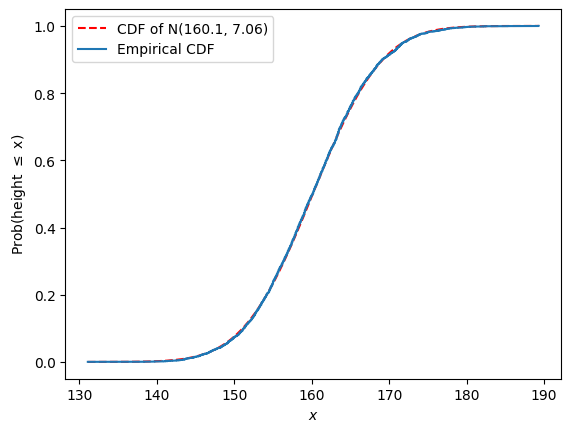

In [26]:
mu, sigma = st.norm.fit(heights)
x = np.linspace(np.min(heights), np.max(heights), 1001)
probs = st.norm.cdf(x, mu, sigma)  # computer the CDF at many points
plt.plot(x, probs, "r--", label=f"CDF of N({mu:.1f}, {sigma:.2f})")
heights_sorted = np.sort(heights)
plt.plot(heights_sorted, np.arange(1, len(heights)+1)/len(heights), drawstyle="steps-post", label="Empirical CDF")
plt.xlabel("$x$")
plt.ylabel("Prob(height $\\leq$ x)")
plt.legend()
plt.show()

6.2.2 A Quantile-Quantile (Q-Q) plot

It compares the sample quantiles against the theoretical quantiles of a normal distribution. So each point is: (theoretical quantile, sample quantile). Each dot compares where a data value falls in the dataset to where it should fall if the data were normally distributed.

*Note: If the points deviate from the red line (especially at the ends), the data is likely skewed or has heavier tails than a normal distribution.*

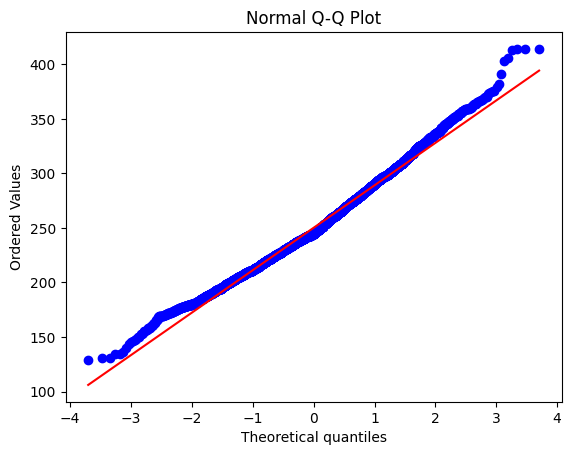

In [ ]:
st.probplot(marathon, dist="norm", plot=plt) #- creates a Normal Q–Q plot
plt.title("Normal Q-Q Plot")
plt.show()



In [30]:
(theoretical_q, sample_q), (slope, intercept, r) = st.probplot(marathon, dist="norm")
print(r)
for tq, sq in zip(theoretical_q[:5], sample_q[:5]):
    print(f"Theoretical q = {tq:.2f}, Sample q = {sq:.2f}")

0.9949044180905947
Theoretical q = -3.70, Sample q = 129.32
Theoretical q = -3.47, Sample q = 130.75
Theoretical q = -3.34, Sample q = 130.97
Theoretical q = -3.26, Sample q = 134.17
Theoretical q = -3.19, Sample q = 134.68


## Summary

<p>The visualizations and statistics generated in the section are foundational tools in data science, used during Exploratory Data Analysis (EDA) to understand the nature of a dataset before applying complex machine learning models.</p>

<p>Below is a discussion of how these concepts relate to the broader data science workflow:</p>

**1. Understanding Data Shape and Skewness** <br>
<p>In data science, the "shape" of your data dictates which algorithms are appropriate.
<p>
Skewness: Real-world data is rarely perfectly symmetric. For instance, while physical traits like height often follow a bell-shaped (Normal) distribution , socioeconomic data like income is typically right-skewed.
</p>
<p>
The Marathon Case: The marathon dataset is a classic example of a left-skewed distribution. This occurs because the fastest runners (the left tail) are fewer and sometimes "truncated," while most participants cluster toward slower finish times. Recognizing this skewness prevents a data scientist from assuming the average runner is "typical" when the median might be a better representation.
</p>

**2. Robustness: Mean vs. Median**<br>
<p>A critical decision in data science is choosing between sensitive and robust statistics:</p>
<p>Sensitivity: The arithmetic mean and standard deviation are highly sensitive to outliers. A single person finishing a marathon in 10 hours can significantly pull the "average" time higher.</p>
<p>Robustness: The median and the Interquartile Range (IQR) are more robust. The IQR is particularly useful as it represents the "50% most typical values," effectively ignoring the extreme 25% at both ends of the spectrum. Using robust statistics ensures that your models aren't overly influenced by anomalous data points.</p>

**3. Outlier Detection and Data Quality**
<p>The Box Plot is a standard tool for identifying "atypical" points using the 1.5 * IQR rule.</p>
<p>In data science, an outlier is not automatically "bad" or a "typo". It might be a legitimate but extreme observation (like an elite athlete's time).</p>

<p>However, identifying these points is vital for data cleaning. A data scientist must decide whether to keep these points, cap them (clipping), or investigate if they represent errors in data collection.</p>

**4. The Importance of Data Models (Normality)**
<p>Fitting a Normal distribution and using Q-Q plots helps to see if a dataset fits a theoretical model.</p>
<p>Parametric Methods: Many powerful statistical tools (like t-tests) assume the data is normally distributed. If the Q-Q plot shows significant deviation from the diagonal line, these tools may yield "garbage" results.</p>

<p>Data Models as Simplifications: While models are useful for making predictions and identifying patterns, they are simplifications of the real world. As the book states: "A hammer neither barks nor can it serve as a screwdriver"—you must verify that your data "fits" the model's assumptions before trusting the output.</p>

**5. Binning and Visualization Ethics**
<p>The Histogram and ECDF offer different perspectives on the same data:</p>

<p>Binning Sensitivity: Histograms can sometimes be misleading because changing the number of bins can hide or highlight certain features. A data scientist might intentionally (or accidentally) choose a bin size that "depicts reality in a good light" while hiding nuances.</p>
<p>The ECDF Advantage: The ECDF is often preferred in professional data science because it does not require binning. It provides an unambiguous view of the data by plotting every observation in ascending order, making it easier to see exactly what percentage of the population falls below a certain threshold</p>


# Practice

This practice set is designed to test your ability to apply descriptive statistics and distribution modeling to a new dataset. You should use a Python environment (like Google Colab) to perform the calculations and plotting, then write a short reflection for each task.

Dataset for Practice: Tip Data
Use the following code to load the tips dataset from the seaborn library. This dataset contains information about bills and tips in a restaurant. We will focus on the total_bill column.

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

df = sns.load_dataset('tips')
data = df['total_bill'].values

**Problem 1: Visualizing Density and Cumulative Probability**<br>

Task: 1.Create a histogram of the total_bill data using 20 bins. 2. Create an ECDF plot for the same data.

Reflection: Compare the two graphs. Which one makes it easier to tell exactly what percentage of people spent less than $20? Looking at the histogram, would you describe this distribution as symmetric, left-skewed, or right-skewed? Why?

**Problem 2: Location and Robustness**<br>

Task: 1. Calculate the Mean and the Median of the total_bill. 2. Calculate the Standard Deviation and the Interquartile Range (IQR).

Reflection: Compare the mean and the median. Given the skewness you identified in Problem 1, which measure of "center" do you think is more representative of a typical customer's bill? If a billionaire entered the restaurant and spent $5,000, which of these four statistics would change the most, and which would stay nearly the same?

**Problem 3: Outlier Detection** <br>

Task 1: Create a horizontal box plot of the total_bill. <br>

Reflection: Are there any outliers in this dataset? In the context of a restaurant, what might these outliers represent? Should we delete them before performing a statistical analysis? why or why not?

**Problem 4: Modeling with the Normal Distribution** <br>

Task: 1. Standardize the data (calculate Z-scores). 2. Create a Q-Q plot to compare the total_bill data against a theoretical Normal distribution.

Reflection: Does the total_bill follow a Normal distribution? Look specifically at the "tails" (the ends) of your Q-Q plot. Does the data have "thicker" tails than a normal distribution? Explain what this means for a restaurant owner trying to predict "extreme" bill amounts based on a bell curve.

**Problem 5: Synthesis**<br>

Task: Reflect on the relationship between all the chapters. How does the shape (Chapter 4) influence which summary statistics (Chapter 5) are meaningful, and how do both of those influence our ability to model the data with a distribution like the Normal curve (Chapter 6)? Use an example to make your points clear. Try your best on this open-ended question.